In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
    color: black !important;
}

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 不同窗口不同延迟时间下的对比

In [4]:
def get_drop_latency(wm, latency, threshold):
    """
        params: wm 水印和事件的映射关系 哪一个事件时间产生了水印
                latency: 窗口被哪个水印触发
        return dict {
            "drop": 真实被丢弃的概率(一般不用),
            "late": 迟到率,
            "avg_wait": 每个窗口的平均等待时间
            "pre_win_wait": 用来具体记录每个窗口的等待时间
        }
    """
    wm = pd.read_csv(wm)
    latency = pd.read_csv(latency)
    wm.columns = ["watermark", "ts"]
    
    # drop1是真正丢的数据
    drop1 = wm[-1:].iloc[0]['watermark']/wm[-1:].iloc[0]['ts']
    # drop2是默认迟到的数据
    drop2 = wm[-2:-1].iloc[0]['watermark']/wm[-2:-1].iloc[0]['ts']
#     print(wm[-2:-1], drop2)
    latency.columns = ["watermark", "window_end"]
    latency = latency.set_index("watermark")
    wm = wm.set_index("watermark")
    res = latency.join(wm, how='inner')
    res = res.reset_index(drop = True)
    
    all_wait = 0
    pre_win_wait = []
    for index, row in res.iterrows():
        if row['ts'] - row['window_end'] > threshold+6000:
            row['ts']  = row['window_end'] + threshold
        pre_win_wait.append(row['ts'] - row['window_end'])
        all_wait += row['ts'] - row['window_end']
    avg_wait = all_wait/len(res)
    
    return dict(drop=drop1, late=drop2, avg_wait=avg_wait, pre_win_wait=pre_win_wait)

In [5]:
def list_params_diff_latecny(WaterPaths, TimePaths):
    index = [0,500,1000, 1500, 2000]
    later_rate, avg_win_wait = [], []
    for i in range(len(WaterPaths)):
        water = WaterPaths[i]
        time = TimePaths[i]
        res = get_drop_latency(water, time, index[i])
        later_rate.append(res['late'])
        avg_win_wait.append(res['avg_wait'])
    data = {
        'later_rate': later_rate,
        'avg_win_wait': avg_win_wait
    }
    df = pd.DataFrame(data, index=index)
    return df

## 窗口为60s时

In [6]:
Paths = [
            "./periodic/20181001P0W60/",
            "./periodic/20181001P0.5W60/",
            "./periodic/20181001P1W60/",
            "./periodic/20181001P1.5W60/",
            "./periodic/20181001P2W60/",
           ]
WaterPaths = [path+"water.csv" for path in Paths]
TimePaths = [path+"timelatency.csv" for path in Paths]

In [7]:
adwater = './adwater/20181001AW60/water.csv'
adwait = './adwater/20181001AW60/timelatency.csv'
def get_com_df(adwater, adwait):
    com = list_params_diff_latecny(WaterPaths, TimePaths)
    a = get_drop_latency(adwater, adwait, 1000)
    df_a = pd.DataFrame({"later_rate":[a['late']],"avg_win_wait":[a['avg_wait']]}, index=["adwater"])
    com = com.append(df_a)
    return com

In [8]:
win_60 = get_com_df(adwater,adwait)

In [9]:
win_60.loc['cdwater'] = [0.32, 2100.17]

## 窗口为30s时

In [10]:
Paths = [
            "./periodic/20181001P0W30/",
            "./periodic/20181001P0.5W30/",
            "./periodic/20181001P1W30/",
            "./periodic/20181001P1.5W30/",
            "./periodic/20181001P2W30/",
           ]
WaterPaths = [path+"water.csv" for path in Paths]
TimePaths = [path+"timelatency.csv" for path in Paths]

In [11]:
adwater = './adwater/20181001AW30/water.csv'
adwait = './adwater/20181001AW30/timelatency.csv'
def get_com_df(adwater, adwait):
    com = list_params_diff_latecny(WaterPaths, TimePaths)
    a = get_drop_latency(adwater, adwait, 1000)
    df_a = pd.DataFrame({"later_rate":[a['late']],"avg_win_wait":[a['avg_wait']]}, index=["adwater"])
    com = com.append(df_a)
    return com

In [12]:
win_30 = get_com_df(adwater,adwait)

In [13]:
win_30.loc['cdwater'] = [0.32, 2100.17]

## 窗口为90s时

In [14]:
Paths = [
            "./periodic/20181001P0W90/",
            "./periodic/20181001P0.5W90/",
            "./periodic/20181001P1W90/",
            "./periodic/20181001P1.5W90/",
            "./periodic/20181001P2W90/",
           ]
WaterPaths = [path+"water.csv" for path in Paths]
TimePaths = [path+"timelatency.csv" for path in Paths]

In [15]:
adwater = './adwater/20181001AW90/water.csv'
adwait = './adwater/20181001AW90/timelatency.csv'
def get_com_df(adwater, adwait):
    com = list_params_diff_latecny(WaterPaths, TimePaths)
    a = get_drop_latency(adwater, adwait, 1000)
    df_a = pd.DataFrame({"later_rate":[a['late']],"avg_win_wait":[a['avg_wait']]}, index=["adwater"])
    com = com.append(df_a)
    return com

In [16]:
win_90 = get_com_df(adwater,adwait)

In [17]:
win_90.loc['cdwater'] = [0.32, 2100.17]

## 窗口为120s时

In [18]:
Paths = [
            "./periodic/20181001P0W120/",
            "./periodic/20181001P0.5W120/",
            "./periodic/20181001P1W120/",
            "./periodic/20181001P1.5W120/",
            "./periodic/20181001P2W120/",
           ]
WaterPaths = [path+"water.csv" for path in Paths]
TimePaths = [path+"timelatency.csv" for path in Paths]

In [19]:
adwater = './adwater/20181001AW120/water.csv'
adwait = './adwater/20181001AW120/timelatency.csv'
def get_com_df(adwater, adwait):
    com = list_params_diff_latecny(WaterPaths, TimePaths)
    a = get_drop_latency(adwater, adwait, 1000)
    df_a = pd.DataFrame({"later_rate":[a['late']],"avg_win_wait":[a['avg_wait']]}, index=["adwater"])
    com = com.append(df_a)
    return com

In [20]:
win_120 = get_com_df(adwater,adwait)

In [21]:
win_120.loc['cdwater'] = [0.32, 2100.17]

## 合并结果

## 显示表格

In [22]:
win = [win_30, win_60, win_90, win_120]
com = pd.concat(win, axis=1)
com.columns = [["WinSize-30s","WinSize-30s","WinSize-60s","WinSize-60s","WinSize-90s","WinSize-90s", "WinSize-120s", "WinSize-120s"],["later_rate", "avg_win_wait", "later_rate", "avg_win_wait", "later_rate", "avg_win_wait","later_rate", "avg_win_wait"]]
com.index =["0ms","500ms","1000ms", "1500ms", "2000ms", "adwater", "cdwater"]

In [23]:
com

WinSize-30s              WinSize-60s              WinSize-90s  \
         later_rate avg_win_wait  later_rate avg_win_wait  later_rate   
0ms        0.480708  1308.152318    0.480708  1244.935532    0.480708   
500ms      0.373897  1799.272302    0.373897  1775.500000    0.373897   
1000ms     0.286769  2263.808726    0.286769  2236.641679    0.286769   
1500ms     0.222758  2777.338527    0.222758  2750.259370    0.222758   
2000ms     0.177758  3318.169459    0.177758  3282.474513    0.177758   
adwater    0.273656  2180.935221    0.280170  2150.630435    0.280507   
cdwater    0.320000  2100.170000    0.320000  2100.170000    0.320000   

                     WinSize-120s               
        avg_win_wait   later_rate avg_win_wait  
0ms      1227.733037     0.480708  1175.578561  
500ms    1738.324805     0.373897  1773.080764  
1000ms   2186.463849     0.286769  2243.541850  
1500ms   2713.566185     0.222758  2764.917768  
2000ms   3245.154616     0.177758  3306.797357  
adwater  2143.724138     0.278447  2082.860499  
cdwater  2100.170000     0.320000  2100.170000

In [24]:
(2764.917768-2082.860499)/2764.917768

0.24668265974990108

## 画图

In [25]:
win_30['Window Size'] = ["30s" for i in range(7)]
win_60['Window Size'] = ["60s" for i in range(7)]
win_90['Window Size'] = ["90s" for i in range(7)]
win_120['Window Size'] = ["120s" for i in range(7)]

In [26]:
sns.set(style="whitegrid")
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Microsoft Yahei']

In [27]:
draw = pd.DataFrame()
draw = draw.append(win)
draw.index =["0ms","500ms","1000ms", "1500ms", "2000ms", "adwater", "cdwater"]*4
draw['delay'] = draw.index
draw['Average Data Lateness Ratio'] = draw['later_rate']
draw['Average Window Waiting Time(ms)'] = draw['avg_win_wait']

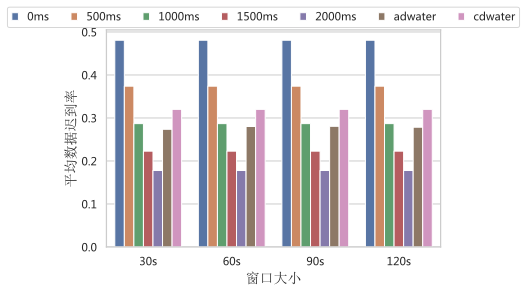

In [30]:
s1 = sns.barplot(x="Window Size", y = "Average Data Lateness Ratio", hue="delay", data=draw)
# s1.set(xlabel="窗口大小", ylabel="平均数据迟到率")
plt.legend(loc='upper center', bbox_to_anchor=(0.47, 1.13), ncol=7, fancybox=True, handlelength=0.6)
plt.xlabel('窗口大小',fontdict={'family':'SimSun', 'size': 14})
plt.ylabel('平均数据迟到率',fontdict={'family':'SimSun', 'size': 14})
plt.savefig('数据迟到率-单车.pdf',bbox_inches='tight',format='pdf')

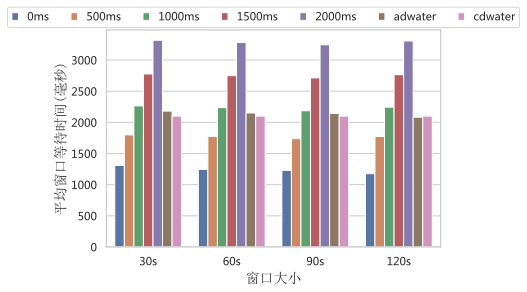

In [31]:
s2 = sns.barplot(x="Window Size", y = "Average Window Waiting Time(ms)", hue="delay", data=draw)
# s2.set(xlabel="窗口大小", ylabel="平均窗口等待时间(毫秒)")
plt.xlabel('窗口大小',fontdict={'family':'SimSun', 'size': 14})
plt.ylabel('平均窗口等待时间(毫秒)',fontdict={'family':'SimSun', 'size': 14})
plt.legend(loc='upper center', bbox_to_anchor=(0.47, 1.13), ncol=7, fancybox=True, handlelength=0.6)
plt.savefig('等待时间-单车.pdf',bbox_inches='tight',format='pdf')